<a href="https://colab.research.google.com/github/ngotancuong/mse.dip/blob/main/L5_1_Image_Subtraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

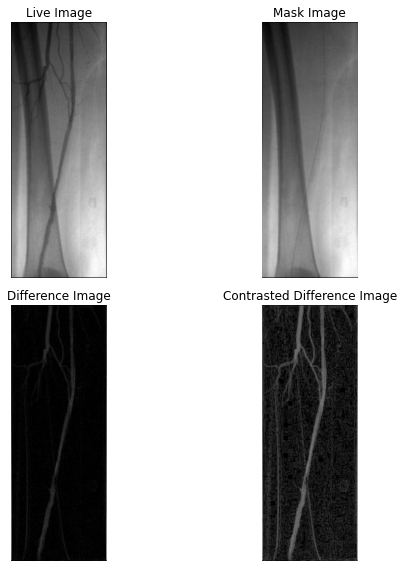

True

In [2]:
import cv2
import numpy as np
import urllib.request
from matplotlib import pyplot as plt

# load test images
live = urllib.request.urlopen('https://raw.githubusercontent.com/ngotancuong/mse.dip/main/images/live.jpg')
arr = np.asarray(bytearray(live.read()), dtype=np.uint8)
liveImg = cv2.imdecode(arr, -1) # 'Load it as it is'

mask = urllib.request.urlopen('https://raw.githubusercontent.com/ngotancuong/mse.dip/main/images/mask.jpg')
arr = np.asarray(bytearray(mask.read()), dtype=np.uint8)
maskImg = cv2.imdecode(arr, -1) # 'Load it as it is'

# convert images to float data type
liveImg = liveImg.astype(float)
maskImg = maskImg.astype(float)

# calculate the difference between two images
diffImg = np.abs(maskImg - liveImg)
gamma = 0.5
diffImg_contrasted = np.power(diffImg, gamma)

# show images
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8,8))
ax = axes.ravel()

ax[0].imshow(liveImg, cmap='gray')
ax[0].set_title('Live Image')

ax[1].imshow(maskImg, cmap='gray')
ax[1].set_title('Mask Image')

ax[2].imshow(diffImg, cmap='gray')
ax[2].set_title('Difference Image')

ax[3].imshow(diffImg_contrasted, cmap='gray')
ax[3].set_title('Contrasted Difference Image')

for a in ax:
    a.axis('off')

plt.tight_layout()
plt.show()

# save images
cv2.imwrite('Image_Subtraction.jpg', diffImg)
cv2.imwrite('Image_Subtraction_with_contrast.jpg', diffImg_contrasted)